In [1]:
%pylab inline
import pandas as pd
import IGtools as igt
import networkx as nx
import os, sys 
import matplotlib.pyplot as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import igraph as ig
import imp
imp.reload(igt)

<module 'IGtools' from 'IGtools.pyc'>

In [3]:
plt.style.use('fivethirtyeight')
def plot_results(x,data,norm=None,label=None):
    yy = map(lambda x: np.mean(data[x]), sorted(data.keys()));
    std_yy = map(lambda x: np.std(data[x]), sorted(data.keys()));
    plt.gca()
    if norm==None:
        plt.errorbar(x, np.array(yy), np.array(std_yy), fmt='s',ms=10,alpha=0.6, label=label);
    else:
        plt.errorbar(x, np.array(yy)/float(norm), np.array(std_yy)/float(norm), fmt='s',ms=10,alpha=0.6, label=label);
    return;

In [4]:
def clique_factor_graph(fg,factor_index):
    new_g = nx.Graph();
    bipartite = nx.get_node_attributes(fg,'bipartite');
    for n in bipartite:
        if bipartite[n]==factor_index:
            nodes = fg.neighbors(n);
            g = nx.relabel_nodes(nx.complete_graph(len(nodes)), dict(zip(range(len(nodes)), nodes)));
            new_g.add_edges_from(g.edges());
    return new_g

In [5]:
num_iter = 30;
N = 50;

deg_ig = {};
deg_lg = {}
deg_g = {}
clustering_lg = {}
import time
from datetime import datetime

k_min = 2
k_max = 15
pmin = k_min/float(N);
pmax = k_max/float(N);
precision = 30
ps = range(k_min,k_max);
n_lg = {}

for l,p in enumerate(ps):
    print l, '/', len(ps), ':', p, 'started:', str(datetime.now())
    deg_g[p] = [];
    deg_lg[p] = []
    deg_ig[p] = []
#     clustering_lg[p] = []
    n_lg[p] = []
    for it in range(num_iter):
        g = nx.powerlaw_cluster_graph(N,p,0.1);
        g = igt.create_configuration_model_graph(nx.degree(g).values())
        lg = igt.line_graph(g);
        ig = igt.interference_graph(lg);
        n_lg[p].append(lg.number_of_nodes())
        deg_g[p].extend(g.degree().values())
        deg_lg[p].extend(lg.degree().values())
        deg_ig[p].extend(ig.degree().values())        
#         clustering_lg[p].extend(nx.clustering(lg).values())


0 / 13 : 2 started: 2020-01-08 14:09:05.420580
1 / 13 : 3 started: 2020-01-08 14:09:20.263041
2 / 13 : 4 started: 2020-01-08 14:09:54.387774
3 / 13 : 5 started: 2020-01-08 14:10:52.500918
4 / 13 : 6 started: 2020-01-08 14:12:33.755418
5 / 13 : 7 started: 2020-01-08 14:14:51.873820
6 / 13 : 8 started: 2020-01-08 14:18:05.686653
7 / 13 : 9 started: 2020-01-08 14:21:43.663177
8 / 13 : 10 started: 2020-01-08 14:26:06.666618
9 / 13 : 11 started: 2020-01-08 14:30:36.478058
10 / 13 : 12 started: 2020-01-08 14:35:13.169664
11 / 13 : 13 started: 2020-01-08 14:40:23.205572
12 / 13 : 14 started: 2020-01-08 14:46:11.136835


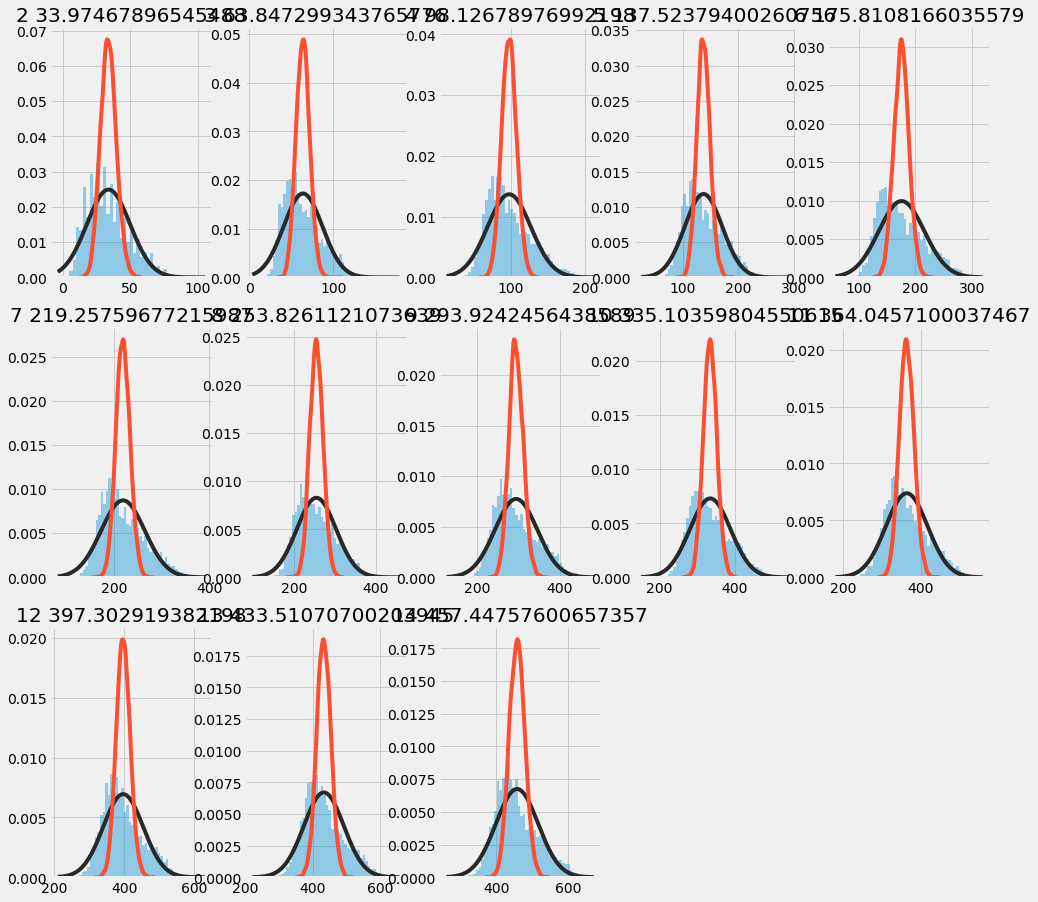

In [6]:
from scipy.stats import binom, norm, poisson
from seaborn import distplot
fig = plt.figure(figsize=(15,30))
for i,p in enumerate(ps):
    ax = plt.subplot(6,5,i+1)
#    bins = np.linspace(0,120,30)
    distplot(deg_ig[p], ax = ax, fit=norm, kde=False)
    data1 = poisson.rvs(np.mean(deg_ig[p]),size=10000)
    distplot(data1,hist=False)
    plt.title(str(p)+' '+str(np.mean(deg_ig[p])))

In [7]:
def no_second_neighbors(ks):
    return np.max([0, np.mean(map(lambda x: x*x, ks)) - np.mean(ks)]);
def degree_zeta(ks):
    return np.mean(ks);

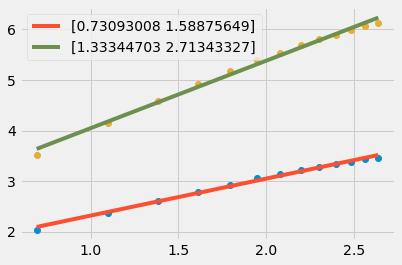

In [8]:
x = sorted(deg_lg.keys())
y = map(lambda x: degree_zeta(deg_lg[x]), sorted(deg_lg.keys()))
yy = map(lambda x: degree_zeta(deg_ig[x]), sorted(deg_lg.keys()))
fit = np.polyfit(np.log(x), np.log(y),1)
z = np.poly1d(fit)
plt.plot(np.log(x), np.log(y),'o')
plt.plot(np.log(x), z(np.log(x)),'-', label=str(fit))

fit = np.polyfit(np.log(x), np.log(yy),1)
z = np.poly1d(fit)
plt.plot(np.log(x), np.log(yy),'o')
plt.plot(np.log(x), z(np.log(x)),'-', label=str(fit))
plt.legend(loc=0)

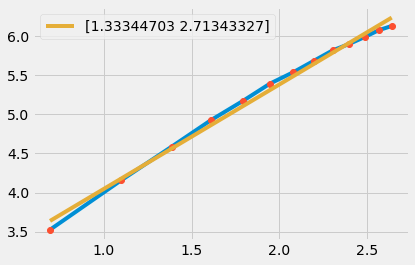

In [9]:
x = sorted(deg_lg.keys())
y= map(lambda x: degree_zeta(deg_ig[x]), sorted(deg_lg.keys()))
plt.plot(np.log(x), np.log(y))
fit = np.polyfit(np.log(x), np.log(y),1)
z = np.poly1d(fit)
plt.plot(np.log(x), np.log(y),'o')
plt.plot(np.log(x), z(np.log(x)),'-', label=str(fit))
plt.legend(loc=0)

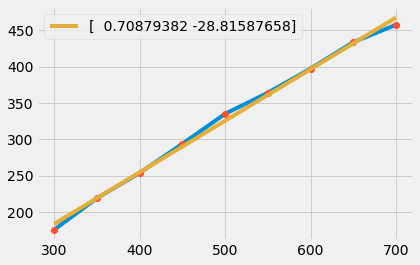

In [10]:
xx = map(lambda x: int(x*N), ps[4:])
y= map(lambda x: degree_zeta(deg_ig[x]), sorted(deg_lg.keys()))[4:]
plt.plot(xx,y);
fit = np.polyfit(xx, y,1)
z = np.poly1d(fit)
plt.plot(xx, y,'o')
plt.plot(xx, z(xx),'-', label=str(fit))
plt.legend(loc=0)